<a href="https://colab.research.google.com/github/mphgardner/Basic_Pavlovian_TDRL/blob/master/Import_CM_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Coding Club 2023-06-20
#Importing Data

This code walks through importing data into Python. We'll be using example data from the Cue Map Task employed in the Gardner Lab. The data from one experiment is stored in a Google drive found here: https://drive.google.com/drive/folders/1FHKjPFIHPGZtSiJTrvOKytSIoVHWAKgK?usp=sharing

Each file in the folder is from a single experimental session from one rat. **We'll start with importing just one file: CM01-01_15.txt**

The .txt data files consist of many lines of text, each line separated by a carriage return. The first several lines contain headers - for most files, including the example session above, this is 7 lines. The headers contain important information regarding the experiment, so it's important to keep, yet this can vary substantially depending upon the experiment.

There are different ways to handle importing header information. One way is to have separate code for handling the n header lines of the code, then to switch to importing of the recorded data. Because the header number changed across sessions in this particular experiment, we used an 'else if' statement to check whether a line was a header, and more specificially, to determine what type of information was in a header line. Below is the code we started writing for header imports.

Once the headers are read, switch to importing the data. There are two column to import. The first column has timestamps of events and the second colum lists event types. The event types are numbered 1 to 144, F, and L, I and O for 148 total events. The I and O refer to the dependent variable, these are when the rat enters the food magazine (I) and when the rat leaves (O) the magazine. The other event types are independent variables which refer to different stimuli which are presented to the animal.

# Challenge for next week

Background

We want to import the data into two matrices, one representing the dependent variable (just one in our example) and the other representing the independent variables. These will be boolean matrices, with size n x t, where n is the number of events and t is the number of millisecond time bins for the experiment.

For the dependent variable, the boolean values should be 1 when the rat is in the food magazine (these are times between an I and an O in the raw data), and zero when the rat is not in the magazine. For example, if the session is 10 seconds long, and there is an I at 5.000 and a O at 6.000, the dependent variable matrix should be a 1 x 10,000 boolean numpy array with true (or 1) values from 5,000 to 5,999. This indicates that the rat was in the food magazine for those millisecond time bins.

The matrix for the independent variables should look exactly the same but should be a matrix of 146 x t (t as the number of millisceconds), rather than a vector of 1 x t as was the case for our single dependent variable. Also, it would be helpful to have a 1 x 146 vector with the categorical descriptor of the independent variables (use the descriptors in the second column in the .txt file).

# Task

Write a function that takes a vector of onset and offset times (these are the I's and O's, respectively, in the second column of the raw data file - the times of I's and O's are the corresponding values in the first column) and makes a new vector with a length of the duration of the session (this should be the difference between the 'start' and 'end' values in the second column) x 1,000 to convert to milliseconds. With values of the boolean vector being whether the signal is on (between an I and an O) or off (between an O and an I) An example of this vector is described in the Background above.

Below is the code we worked on during coding club for extracting the data. You'll have to play around with the different code to figure out how to extract the two columns of data (timestamps in seconds in column 1 and categorical descriptor of the event in column 2). Ignore the headers for now!


In [ ]:
import os
import pandas as pd
import glob
from google.colab import drive
from os.path import join
import numpy as np

drive.mount('/content/gdrive')




go to google drive, find the shared drive listed above and add a shortcut to the shared folder. This will create a shortcut within your gdrive. Set your working directory to that location

In [12]:
working_dir = '/content/gdrive/My Drive/Colab Notebooks/data/CM_Data/Data'

In [28]:
fname = glob.glob(join(working_dir,'CM01-01_15.txt'))
fname = fname[0]
print(fname)

/content/gdrive/My Drive/Colab Notebooks/data/CM_Data/Data/CM01-01_15.txt


In [29]:
with open(fname,'r') as r:
  f = r.readlines()

In [30]:
f[0]

'Reward Zones: [46, 113]\n'

In [34]:
for idx,line in enumerate(f):
  #print(line)
  #print(idx)
  line = line.replace("\n","")
  if line == "##":
    print(f"{idx}: {line}")
    break
start_idx = idx +1
print(start_idx)

6: ##
7


let's skip headers for now

In [35]:
data = f[start_idx:]
data = [line.replace("\n","") for line in data]

# d2 = []
# for line in data:
#   d2.append(line.replace("\n",""))

In [36]:
print(data[0])

-328.8306   I


Now let's access each line within the data list and collect the times (first column) and the events (second column)

In [40]:
l2 = data[0].split("   ")
print(l2[0])
print(l2[1])

-328.8306
I


In [42]:
times=[]
events=[]

for line in data:
  l2 = line.split("   ")
  times.append(l2[0])
  events.append(l2[1])

In [46]:
print(times[0:10])
print(events[0:10])


['-328.8306', '-328.6300', '-270.3963', '-270.0735', '-164.0716', '-163.5771', '-147.1261', '-146.9643', '-143.2354', '-143.1874']
['I', 'O', 'I', 'O', 'I', 'O', 'I', 'O', 'I', 'O']


convert times and events into a numpy array

In [49]:
times = np.array(times).astype(np.float32)
events = np.array(events)


In [51]:
i = events=='I'
o = events=='O'
i[0:10]




array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

If an output occurs from the start of the session, remove it

In [ ]:
if times[o[0]] < times[i[0]]:
  o = np.delete(o,0)

In [ ]:
#initialize the time vector in milliseconds
RespV = np.zeros(int(times[-1]*1000)).astype(bool)


if times[o[0]] < times[i[0]]:

for ind in i:
  if times[i] < 0:
    continue
  #make sure that the next output follows in the current input
  if times[o[ind]] < times[i[ind + 1]]:



10368.447

In [1]:
import os
import pandas as pd
import glob
from google.colab import drive
from os.path import join
import numpy as np
print(os.getcwd())
drive.mount('/content/gdrive')
print(os.getcwd())

/content
Mounted at /content/gdrive
/content


In [5]:
#create your 'data' subdirectory in google drive, then create a test file
#open it in google drive!
working_dir = '/content/gdrive/My Drive/Colab Notebooks/data/MG_Lab_Data'


In [ ]:
glob.glob(join(working_dir,'*.txt'))

['/content/gdrive/My Drive/Colab Notebooks/data/MG_Lab_Data/CM01-15_57.txt',
 '/content/gdrive/My Drive/Colab Notebooks/data/MG_Lab_Data/CM01-16_13.txt',
 '/content/gdrive/My Drive/Colab Notebooks/data/MG_Lab_Data/CM01-16_15.txt',
 '/content/gdrive/My Drive/Colab Notebooks/data/MG_Lab_Data/CM01-16_14.txt']

In [ ]:
fname = glob.glob(join(working_dir,'*.txt'))[0]
print(fname)

/content/gdrive/My Drive/Colab Notebooks/data/MG_Lab_Data/CM01-15_57.txt


In [ ]:
with open(fname,'r') as r:
  f = r.readlines()

In [ ]:
for idx,line in enumerate(f):
  line = line.replace("\n","")
  if line == "##":
    print(f"{idx}: {line}")
    break
start_idx = idx +1

6: ##


In [ ]:
data = f[start_idx:]
data = [line.replace("\n","") for line in data]

# d2 = []
# for line in data:
#   d2.append(line.replace("\n",""))

In [ ]:
times=[]
events=[]

for line in data:
  l2 = line.split("   ")
  times.append(l2[0])
  events.append(l2[1])

In [ ]:
times = np.array(times).astype(np.float32)
events = np.array(events)
i_idxs = events=='I'
o_idxs = events=='O'


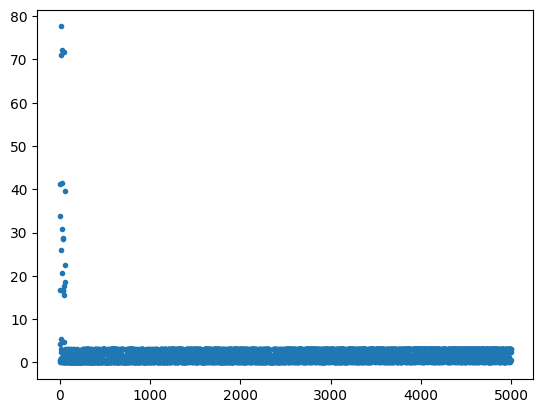

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(np.diff(times[0:5000]),'.')

Here is the beginning of an import function to collect the data. Here we were working on importing the header data

In [ ]:
"""
Created on Fri May 26 13:44:34 2023
@author: mgardner

Importing data for the Cue Map experiment

"""
import numpy as np
import re
###########OUTLINE######################################
#get the data folder location

#open the data file

#read the header information

#get rat number

#get experiment information

#import data

#look for double pound sign

#for data collection determine the inpokes and outpokes for the duration of each index
#the index refers to a cue

#loop through all indices in the session and collect data

#save the data
#############################################################3

#Function for extracting inpoke/outpoke times and determining number of pokes during an event
#or the percent time spent during an event


#get the data folder location
data_folder = 'C:/Data/Cue Map/Pi_021523_Run/Data'

file  = 'CM02-01_23.txt'

#get full path of file
filename = data_folder + '/' + file

#open the data file
with open (filename, 'r') as r:
    f = r.readlines()

#loop through each line in the headers
for i,line in enumerate(f):

    #determine whether this is header or not
    if line == '##':

        break

    #check for the reward zones
    elif line[:12] == 'Reward Zones':
        reward_zones = [int(s) for s in re.findall(r'\d+', line)]
        continue

        #check for Date
    elif line.count('/') == 2:
        date = line

    #find the list info
    elif line[:4] == 'List':
        file_info = line[6:-1]

#Now loop through data
for line in f[i+1:]:




        #check for




#read the header information

#get rat number

#get experiment information

#import data

#look for double pound sign

#for data collection determine the inpokes and outpokes for the duration of each index
#the index refers to a cue

#loop through all indices in the session and collect data

#save the data



######


